<h1> Exponential Smoothing </h1>

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing, Holt, SimpleExpSmoothing

data = pd.read_csv('electricistan-national-energy-grid/data_preparation.csv')
data['datetime'] = pd.to_datetime(data['datetime'])
data['datetime_day_saving'] = pd.to_datetime(data['datetime_day_saving'])
data.set_index('datetime', inplace=True, drop=False)
data.tail(3)

,datetime,power,datetime_day_saving,Is_15_Min_Interval,daylight_saving,datetime.1,week_days,month,date,First_Difference
datetime,,,,,,,,,,
2022-09-14 22:15:00,2022-09-14 22:15:00,4533,2022-09-14 23:15:00,True,True,2022-09-14 22:15:00,2,9,2022-09-14,-30.0
2022-09-14 22:30:00,2022-09-14 22:30:00,4512,2022-09-14 23:30:00,True,True,2022-09-14 22:30:00,2,9,2022-09-14,-21.0
2022-09-14 22:45:00,2022-09-14 22:45:00,4487,2022-09-14 23:45:00,True,True,2022-09-14 22:45:00,2,9,2022-09-14,-25.0


<h2>Teile die Daten</h2>
Teile die Daten in ein Trains-Set und ein Test-Set auf. Das Test-Set enthält Daten für das letzte Jahr. Entspricht 365*24*15 Datenpunkte

In [48]:
start_time = pd.to_datetime('2018-09-14 22:45:00')
end_time = pd.to_datetime('2021-09-14 22:45:00')
data_train = data.loc[data['datetime'].between(start_time, end_time, inclusive='both')]
#data_train = data[data['datetime'] < start_time]
display(data_train.tail(3))


data_test = data[data['datetime'] >= end_time]
display(data_test.head(3))

,datetime,power,datetime_day_saving,Is_15_Min_Interval,daylight_saving,datetime.1,week_days,month,date,First_Difference
datetime,,,,,,,,,,
2021-09-14 22:15:00,2021-09-14 22:15:00,4585,2021-09-14 23:15:00,True,True,2021-09-14 22:15:00,1,9,2021-09-14,-24.0
2021-09-14 22:30:00,2021-09-14 22:30:00,4538,2021-09-14 23:30:00,True,True,2021-09-14 22:30:00,1,9,2021-09-14,-47.0
2021-09-14 22:45:00,2021-09-14 22:45:00,4520,2021-09-14 23:45:00,True,True,2021-09-14 22:45:00,1,9,2021-09-14,-18.0


,datetime,power,datetime_day_saving,Is_15_Min_Interval,daylight_saving,datetime.1,week_days,month,date,First_Difference
datetime,,,,,,,,,,
2021-09-14 22:45:00,2021-09-14 22:45:00,4520,2021-09-14 23:45:00,True,True,2021-09-14 22:45:00,1,9,2021-09-14,-18.0
2021-09-14 23:00:00,2021-09-14 23:00:00,4444,2021-09-15 00:00:00,True,True,2021-09-14 23:00:00,1,9,2021-09-14,-76.0
2021-09-14 23:15:00,2021-09-14 23:15:00,4312,2021-09-15 00:15:00,True,True,2021-09-14 23:15:00,1,9,2021-09-14,-132.0


<h2> Simple Exponential Smoothing </h2>
Exponential Smoothing gewichtet für die Prognose ältere Daten geringer, sodass aktuellere Daten einen grösseren Einfluss auf die Prognose haben. Als erstes die einfachste Variante. 
<br>
$f_{t+1} = \alpha * y_t + (1-\alpha) f_{t-1}$
<br>
$f_{t} = \alpha * y_{t-1} + (1-\alpha) * f_{t-2}$
<br>
$f_{t+1} = \alpha * y_t + (1-\alpha) \alpha * y_{t-1} + (1-\alpha) * f_{t-2}$
<br>
Die Parameter verändern sich wich wie 
<ol>
    <li>$\alpha$</li>
    <li>$(1-\alpha) \, \alpha$</li>
    <li>$(1-\alpha)^2 \, \alpha$</li>
</ol>

In [23]:
model_ses = SimpleExpSmoothing(data_train['power'])
fit_ses = model_ses.fit()
fit_ses.summary()

/home/forme/Documents/IT/python/electricistan/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
/home/forme/Documents/IT/python/electricistan/venv/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Dep. Variable:,power,No. Observations:,340314
Model:,SimpleExpSmoothing,SSE,1214916393.917
Optimized:,True,AIC,2783880.434
Trend:,None,BIC,2783901.909
Seasonal:,None,AICC,2783880.434
Seasonal Periods:,None,Date:,"Fri, 22 Dec 2023"
Box-Cox:,False,Time:,15:13:50
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9950000,alpha,True
initial_level,3767.0000,l.0,False


In [12]:
fc_ses = pd.DataFrame(fit_ses.forecast(len(data_test.index)),index = data_test.index)


<h2>Holt's Exponential Smoothing</h2>
Holts methode ergänzt die simple Methode mit einem Trend.
<br>
$F_t = α * y_t + (1 - α) * (F_{t-1} + T_t)$
<br>
$T_t = β * (y_t - F_{t-1}) + (1 - β) * T_{t-1}$

In [25]:
model_holt = Holt(data_train['power'])
fit_holt = model_holt.fit()
fit_holt.summary()

/home/forme/Documents/IT/python/electricistan/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)


Dep. Variable:,power,No. Observations:,340314
Model:,Holt,SSE,470828480.174
Optimized:,True,AIC,2461288.312
Trend:,Additive,BIC,2461331.262
Seasonal:,None,AICC,2461288.312
Seasonal Periods:,None,Date:,"Fri, 22 Dec 2023"
Box-Cox:,False,Time:,15:16:07
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9950000,alpha,True
smoothing_trend,0.6633333,beta,True


In [18]:
fc_holt = pd.DataFrame(fit_holt.forecast(len(data_test.index)),index = data_test.index)

<h2>Holt-Winter Exponential Smoothing</h2>
Die Holt-Winter methode ergänzt die simple Methode mit einem Trend und einer Saisonalität


In [38]:
periods = 365*25*4
model_hw = ExponentialSmoothing(data_train['power'], seasonal_periods = periods 
                                ,seasonal = 'mul', trend = 'add', damped_trend=True, freq='15Min')
fit_hw = model_hw.fit()
fit_hw.summary()

MemoryError: Unable to allocate 84.4 GiB for an array with shape (11329107789,) and data type float64

In [ ]:
fc_hw = pd.DataFrame(fit.forecast(12),index = daterange)


<IPython.core.display.Javascript object>


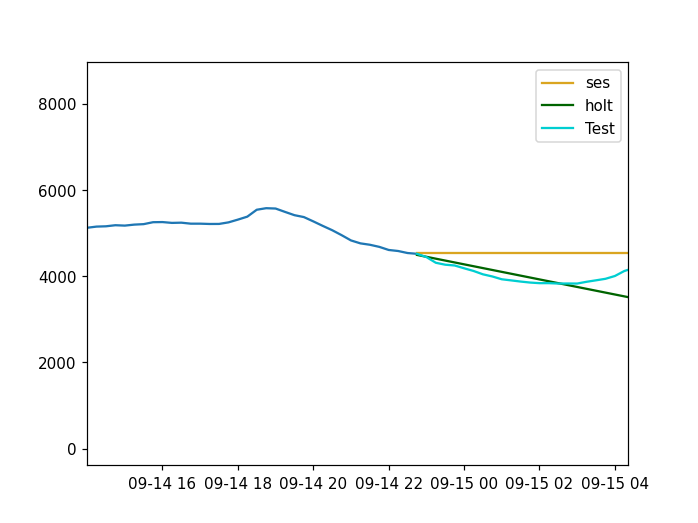

In [51]:
%matplotlib notebook

plt.plot(data_train['power'])
plt.plot(fc_ses,label='ses', color='goldenrod')
plt.plot(fc_holt, label='holt', color = 'darkgreen')
plt.plot(data_test['power'],label='Test', color='darkturquoise')
plt.legend()
plt.show()

data_train

In [44]:
data_train['power']

datetime
2018-09-14 22:45:00    4481
2018-09-14 23:00:00    4381
2018-09-14 23:15:00    4278
2018-09-14 23:30:00    4216
2018-09-14 23:45:00    4191
                       ... 
2021-09-14 21:45:00    4681
2021-09-14 22:00:00    4609
2021-09-14 22:15:00    4585
2021-09-14 22:30:00    4538
2021-09-14 22:45:00    4520
Name: power, Length: 105217, dtype: int64

,seasonal_12,seasonal_365
datetime,,
2018-09-14 22:45:00,35.540921,200.579310
2018-09-14 23:00:00,5.457260,189.854022
2018-09-14 23:15:00,-11.463782,178.652467
2018-09-14 23:30:00,-19.422698,145.375418
2018-09-14 23:45:00,-16.491525,120.307502


<IPython.core.display.Javascript object>


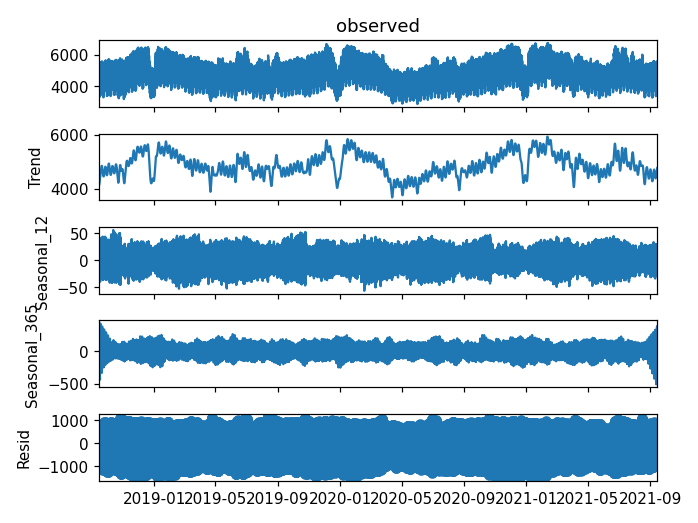

In [52]:
from statsmodels.tsa.seasonal import MSTL
from statsmodels.tsa.seasonal import DecomposeResult

mstl = MSTL(data_train["power"], periods=[12, 365])
res = mstl.fit()
display(res.seasonal.head())
ax = res.plot()